In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# === 1. Load dataset ===
file_path = "./health_records.csv"
df = pd.read_csv(file_path)

# === 2. Consistent formatting ===
df['date_recorded'] = pd.to_datetime(df['date_recorded'], errors='coerce')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# === 3. Remove outliers (IQR method) ===
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(['patient_id'])
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                      (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# === 4. Normalize (Min-Max scaling [0,1]) ===
scaler = MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])

# === 5. Standardize (Z-score scaling) ===
standard_scaler = StandardScaler()
df_standardized = df_no_outliers.copy()
df_standardized[numeric_cols] = standard_scaler.fit_transform(df_no_outliers[numeric_cols])

# Save in current folder (same directory as your script / notebook)
df_no_outliers.to_csv("health_records_clean.csv", index=False)
df_scaled.to_csv("health_records_normalized.csv", index=False)
df_standardized.to_csv("health_records_standardized.csv", index=False)

print("✅ Files saved successfully in the current directory:")
print("- health_records_clean.csv")
print("- health_records_normalized.csv")
print("- health_records_standardized.csv")



✅ Files saved successfully in the current directory:
- health_records_clean.csv
- health_records_normalized.csv
- health_records_standardized.csv


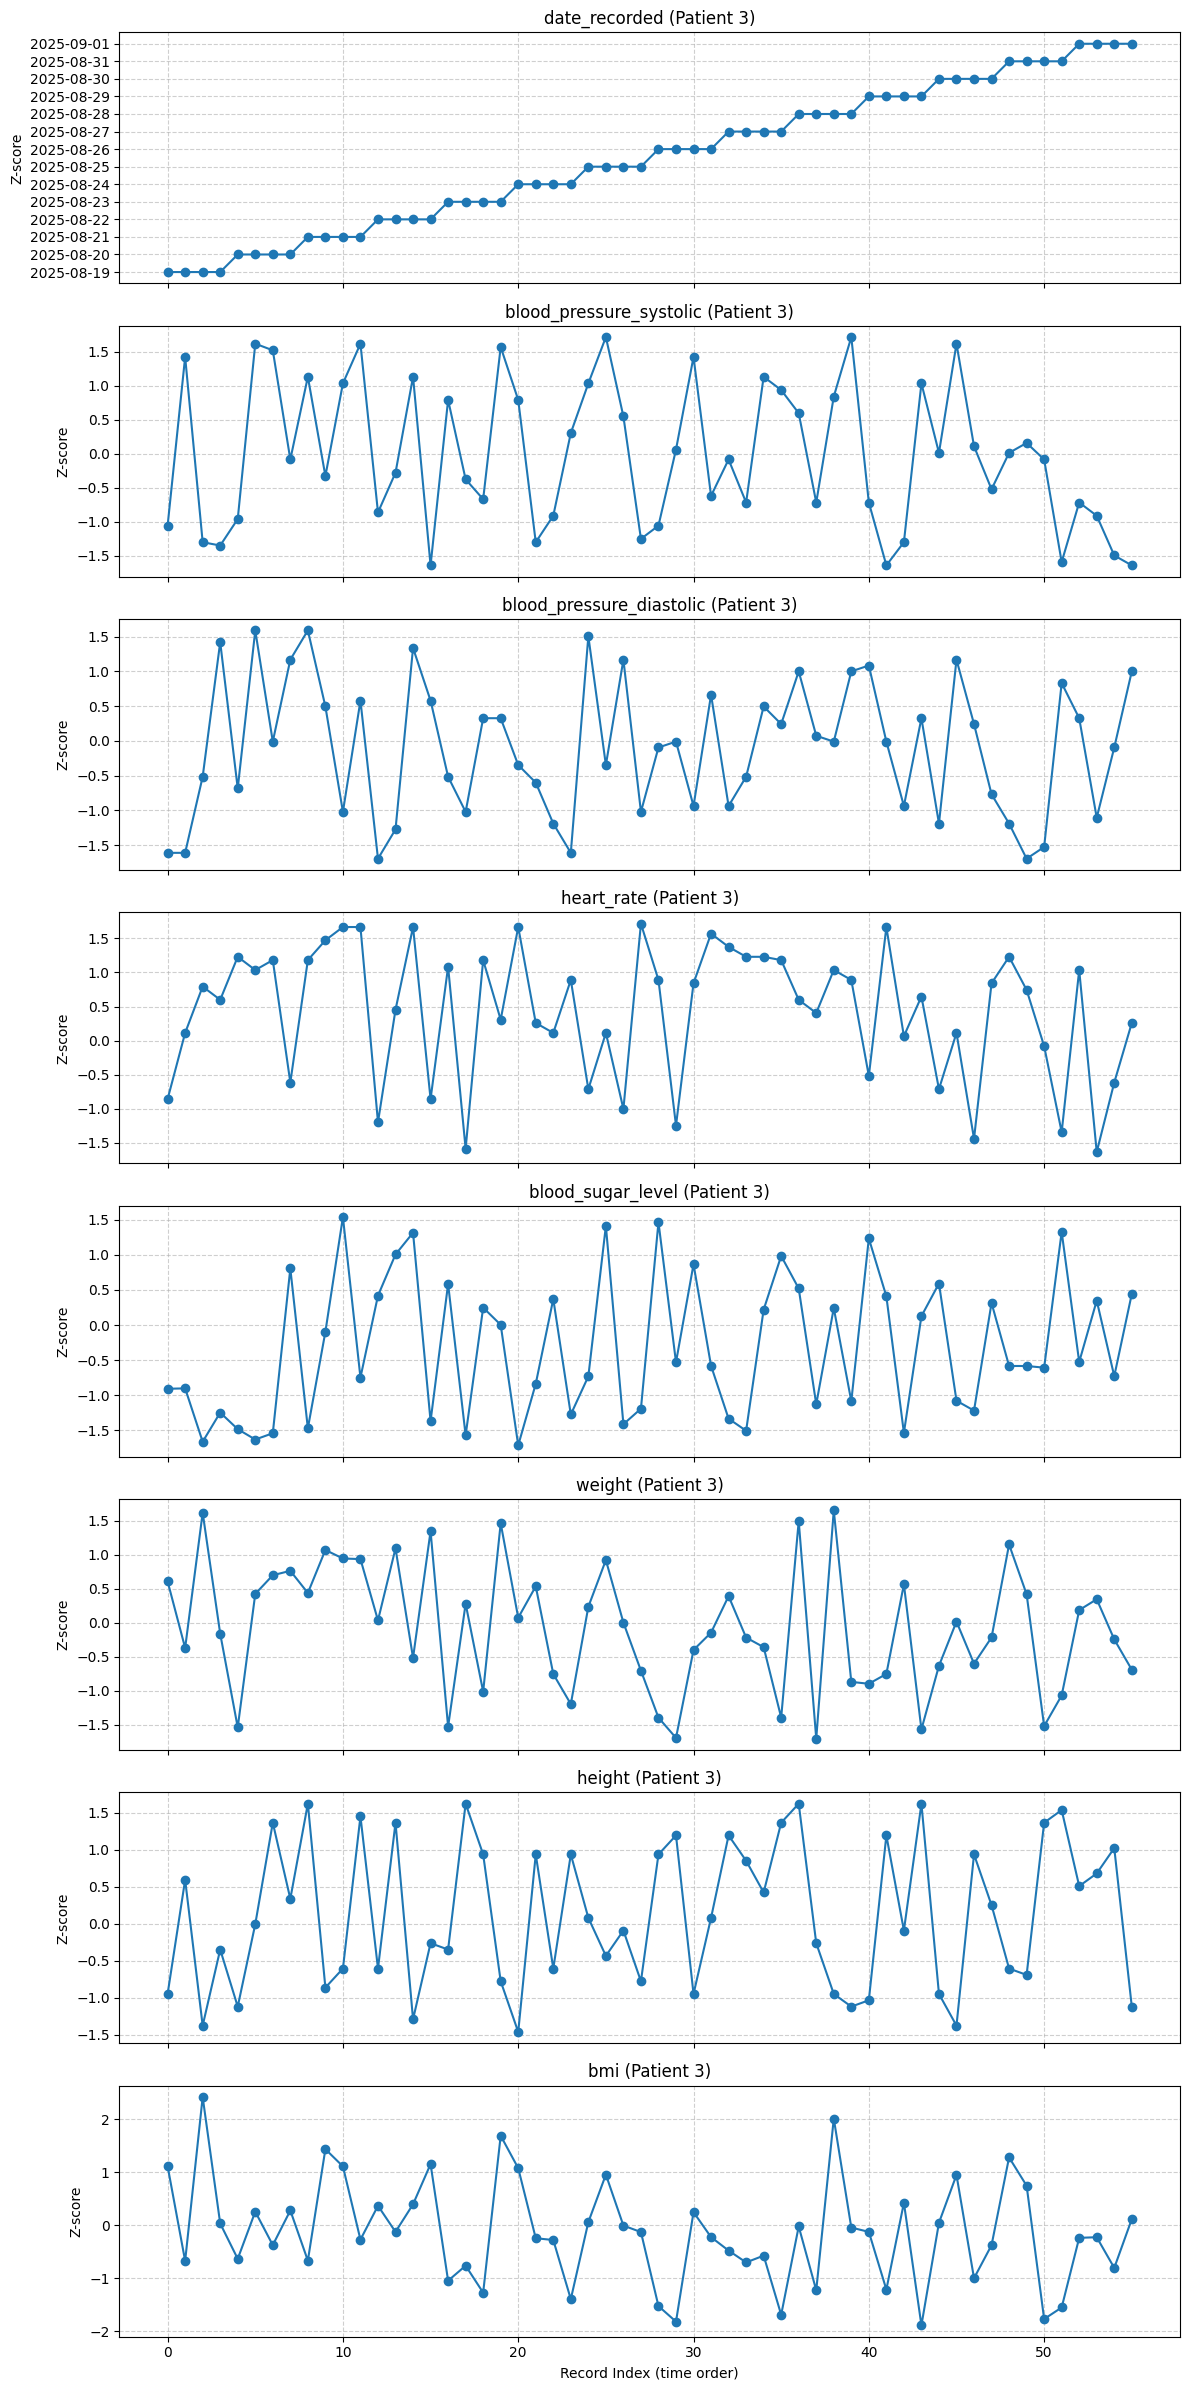

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Load standardized dataset ===
df = pd.read_csv("health_records_standardized.csv")

# === 2. Ask user for patient ID ===
patient_id = int(input("Enter the patient ID to plot: "))

# === 3. Filter patient data ===
patient_data = df[df['patient_id'] == patient_id].reset_index(drop=True)

if patient_data.empty:
    print(f"No records found for patient ID {patient_id}.")
else:
    # === 4. Drop non-numeric columns ===
    features = patient_data.drop(columns=['patient_id'])
    n_features = features.shape[1]

    # === 5. Create subplots ===
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3*n_features), sharex=True)

    for i, col in enumerate(features.columns):
        axes[i].plot(patient_data.index, features[col], marker='o', linestyle='-')
        axes[i].set_title(f"{col} (Patient {patient_id})")
        axes[i].set_ylabel("Z-score")
        axes[i].grid(True, linestyle="--", alpha=0.6)

    axes[-1].set_xlabel("Record Index (time order)")
    plt.tight_layout()
    plt.show()


